In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dataset = "SPECT"
df = pd.read_csv(dataset + '.csv')

In [8]:
if dataset == "SPECT":
    X = df.iloc[:, 1:].values
    y = df.iloc[:, 0:1].values
    y = np.where(y == 'Yes', 1, 0)
elif dataset == "IRIS":
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1:].values
    y = np.where(y == 'Iris-setosa', 1, 0)

In [14]:
class Neural_Network(object):
  def __init__(self):
  #parameters
    self.inputSize = X.shape[1]
    self.outputSize = 1
    self.hiddenSize = 3
    self.learning_rate = 0.001

  #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
#     print(self.z3.shape)
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def backward(self, X, y, o):
    # backward propagate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error
#     print(y.shape, self.sigmoidPrime(o).shape)
#     print(self.W2.T.shape)
    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += self.learning_rate*X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.learning_rate*self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

  def train(self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)


In [15]:
loss = []
NN = Neural_Network()
for i in range(5000):
    loss.append(np.mean(np.square(y - NN.forward(X))))
    NN.train(X, y)

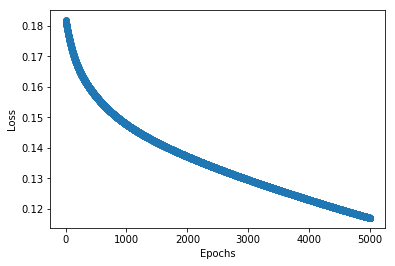

In [16]:
plt.plot(range(1, len(loss) + 1), loss, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.yticks(np.arange(min(loss), max(loss)+1, 2))
plt.show()